<a href="https://colab.research.google.com/github/Mkmittal/PS_PROJECT/blob/master/WindSpeed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [4]:
%tensorflow_version 2.x
import tensorflow as tf
import timeit
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
from google.colab import files
uploaded = files.upload()

Saving G10_Wind_Time_data.csv to G10_Wind_Time_data.csv


In [9]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['G10_Wind_Time_data.csv']))

In [10]:
df2

,TimeStamp,WindSpeed
0,2018-01-01 00:00:00+00:00,2.195344
1,2018-01-01 00:10:00+00:00,2.099560
2,2018-01-01 00:20:00+00:00,1.896112
3,2018-01-01 00:30:00+00:00,1.496820
4,2018-01-01 00:40:00+00:00,1.312798
...,...,...
118075,2020-03-30 23:10:00+00:00,4.870994
118076,2020-03-30 23:20:00+00:00,4.364661
118077,2020-03-30 23:30:00+00:00,4.443689
118078,2020-03-30 23:40:00+00:00,4.432279


In [11]:
df=df2.dropna()

In [15]:
df['TimeStamp'] = pd.to_datetime(df['TimeStamp'],infer_datetime_format=True)
indexedds = df.set_index(['TimeStamp'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


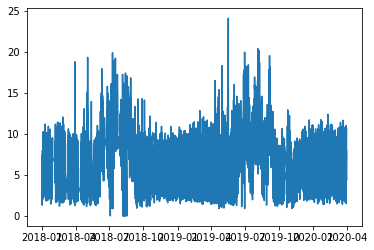

In [16]:
plt.plot(indexedds)
plt.show()

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [21]:
n=20
series = indexedds.head(int(len(indexedds)*(n/100)))
dataset = series.values
dataset = dataset.astype('float32')
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

12722 6267


In [22]:
def create_dataset(dataset, look_back=1):
  # look_back is the no of previous values we want to use to predict the next value
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [23]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [24]:
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=200, batch_size=2, verbose=2)

Epoch 1/200
 - 16s - loss: 0.6478
Epoch 2/200
 - 16s - loss: 0.5191
Epoch 3/200
 - 16s - loss: 0.5208
Epoch 4/200
 - 16s - loss: 0.5210
Epoch 5/200
 - 16s - loss: 0.5187
Epoch 6/200
 - 16s - loss: 0.5190
Epoch 7/200
 - 16s - loss: 0.5193
Epoch 8/200
 - 17s - loss: 0.5201
Epoch 9/200
 - 16s - loss: 0.5191
Epoch 10/200
 - 16s - loss: 0.5196
Epoch 11/200
 - 16s - loss: 0.5195
Epoch 12/200
 - 16s - loss: 0.5186
Epoch 13/200
 - 16s - loss: 0.5187
Epoch 14/200
 - 16s - loss: 0.5181
Epoch 15/200
 - 16s - loss: 0.5193
Epoch 16/200
 - 16s - loss: 0.5194
Epoch 17/200
 - 16s - loss: 0.5189
Epoch 18/200
 - 16s - loss: 0.5187
Epoch 19/200
 - 16s - loss: 0.5193
Epoch 20/200
 - 16s - loss: 0.5171
Epoch 21/200
 - 16s - loss: 0.5186
Epoch 22/200
 - 16s - loss: 0.5168
Epoch 23/200
 - 16s - loss: 0.5179
Epoch 24/200
 - 16s - loss: 0.5175
Epoch 25/200
 - 16s - loss: 0.5175
Epoch 26/200
 - 16s - loss: 0.5161
Epoch 27/200
 - 16s - loss: 0.5159
Epoch 28/200
 - 16s - loss: 0.5159
Epoch 29/200
 - 16s - loss: 0

Train Score: 0.51 MSE (0.71 RMSE)
Test Score: 1.32 MSE (1.15 RMSE)


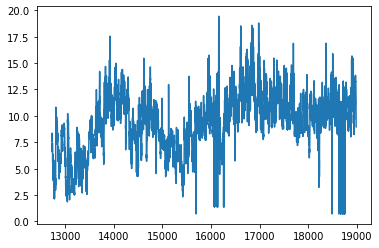

In [54]:
import math
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions

# plt.plot(trainPredictPlot)
# plt.plot(dataset[18880:])
plt.plot(testPredictPlot)
plt.show()

In [50]:
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100
print(mean_absolute_percentage_error(testY,testPredict))

8.471924629417698
